In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
image_size = (32,32)
batch_size = 32
train_flow_path= './images/training_set'
test_flow_path = './images/test_set'

In [3]:
data_gen_train = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True
)

train_flow = data_gen_train.flow_from_directory(
    train_flow_path,
    target_size=image_size,
    batch_size=batch_size,
    color_mode='rgb',
    classes=['Э','Ю','Я'],
    class_mode='categorical',
    shuffle=True,
    seed=42
)

data_gen_test = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
)

test_flow = data_gen_test.flow_from_directory(
    test_flow_path,
#    train_flow_path,
    target_size = image_size,
    batch_size = batch_size,
    color_mode='rgb',
    classes=['Э','Ю','Я'],
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 708 images belonging to 3 classes.
Found 282 images belonging to 3 classes.


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten, BatchNormalization

In [5]:
model = Sequential()
model.add(Flatten(input_shape=[32,32,3]))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               786688    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                

In [6]:
model_hist = model.fit_generator(train_flow, epochs=100, validation_data=test_flow)

Epoch 1/100


/home/chappybunny/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/home/chappybunny/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


23/23 [==============================] - 1s 60ms/step - loss: 0.5816 - accuracy: 0.7952 - val_loss: 147.3745 - val_accuracy: 0.3333
Epoch 2/100
23/23 [==============================] - 1s 26ms/step - loss: 0.1556 - accuracy: 0.9506 - val_loss: 113.6394 - val_accuracy: 0.3333
Epoch 3/100
23/23 [==============================] - 1s 26ms/step - loss: 0.1238 - accuracy: 0.9647 - val_loss: 59.3391 - val_accuracy: 0.3333
Epoch 4/100
23/23 [==============================] - 1s 25ms/step - loss: 0.1703 - accuracy: 0.9732 - val_loss: 77.6879 - val_accuracy: 0.3333
Epoch 5/100
23/23 [==============================] - 1s 28ms/step - loss: 0.0936 - accuracy: 0.9873 - val_loss: 43.8158 - val_accuracy: 0.3333
Epoch 6/100
23/23 [==============================] - 1s 39ms/step - loss: 0.0714 - accuracy: 0.9802 - val_loss: 26.5061 - val_accuracy: 0.3333
Epoch 7/100
23/23 [==============================] - 1s 26ms/step - loss: 0.0680 - accuracy: 0.9802 - val_loss: 13.7786 - val_accuracy: 0.3511
Epoch 8/1

23/23 [==============================] - 1s 27ms/step - loss: 0.0256 - accuracy: 0.9929 - val_loss: 9.3796 - val_accuracy: 0.3794
Epoch 59/100
23/23 [==============================] - 1s 28ms/step - loss: 0.0195 - accuracy: 0.9986 - val_loss: 19.7160 - val_accuracy: 0.3369
Epoch 60/100
23/23 [==============================] - 1s 26ms/step - loss: 0.0172 - accuracy: 0.9915 - val_loss: 5.3036 - val_accuracy: 0.3972
Epoch 61/100
23/23 [==============================] - 1s 25ms/step - loss: 0.0288 - accuracy: 0.9929 - val_loss: 3.0406 - val_accuracy: 0.5319
Epoch 62/100
23/23 [==============================] - 1s 24ms/step - loss: 0.0148 - accuracy: 0.9972 - val_loss: 7.7441 - val_accuracy: 0.5567
Epoch 63/100
23/23 [==============================] - 1s 23ms/step - loss: 0.0218 - accuracy: 0.9901 - val_loss: 1.3859 - val_accuracy: 0.7270
Epoch 64/100
23/23 [==============================] - 1s 26ms/step - loss: 0.0084 - accuracy: 0.9972 - val_loss: 3.2742 - val_accuracy: 0.6702
Epoch 65/10

In [7]:
def plot_history(history, scores,figsize=(12,6), path_saving='./images/report/', name='MultiLayerNetworkScores.png'):
    n = len(scores)
    fig,axs = plt.subplots(nrows=1,ncols=n,figsize=figsize)
    for i,score in enumerate(scores):
        axs[i].plot(history.history[score])
        axs[i].plot(history.history[f'val_{score}'])
        axs[i].set_title(f'Model {score}')
        axs[i].set_ylabel(f'{score}')
        axs[i].set_xlabel(f'epoch')
        axs[i].legend(['Train', 'Test'], loc='upper left')
    
    fig.savefig(path_saving+name)

In [8]:
from keras.utils import plot_model

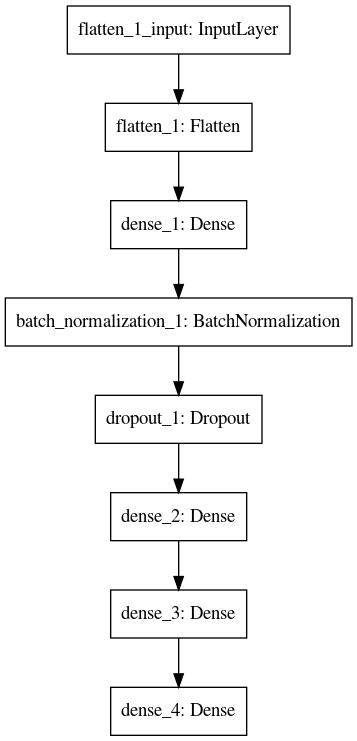

In [9]:
plot_model(model,'./images/report/MultiLayerNetworkStructure.png')

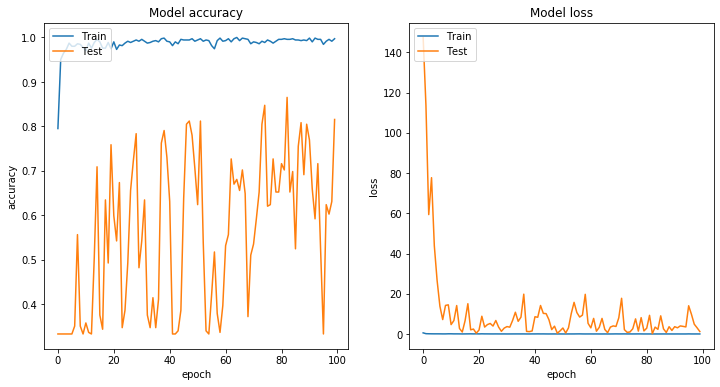

In [10]:
plot_history(model_hist,['accuracy','loss'])